# AMAT503:  Lecture 01

January 10, 2018.

Michael Lamoureux

# HEADS' UP!

I will be using [Jupyter notebooks](https://jupyter.org) in this classroom, to combine text, math, and graphics. 

Students can access Jupyter at [ucalgary.syzygy.ca](https://ucalgary.syzygy.ca)

An eBook on how to use syzygy is here: [intro.syzygy.ca](http://intro.syzygy.ca)

Lecture notes, code, assignments, etc are available on a git repo: [github.com/mlamoureux](https://github.com/mlamoureux)

In [ ]:
## Some startup commands

from IPython.display import IFrame

## Course Outline

In [89]:
IFrame("./AMAT503-W2018-LEC1-outline.pdf", width=1000, height=500)

## Course syllabus

In [90]:
IFrame("./AMAT503-W2018-syllabus.pdf", width=1000, height=300)

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Quick Intro

- what is a wave
- what is a wavelet?
- what do we use them for?
- how do we compute them
- how do we do computations with them
- what are their mathematical properties
- what next?

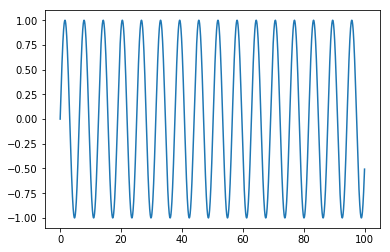

In [26]:
## This is a wave
x=np.linspace(0,100,10000)
y=np.sin(x)
plt.plot(x,y)

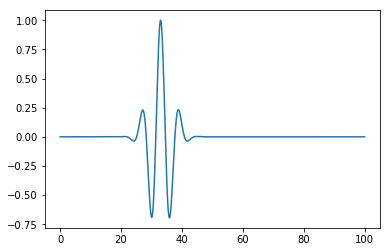

In [30]:
## This is a wavelet
x=np.linspace(0,100,10000)
y=np.sin(x)*np.exp(-(x-33)**2/25)
plt.plot(x,y)

## Notice:

A wave is an oscillating function, like sine or cosine, goes on "forever."

A wavelet is a localized oscillation. It has a location, and something like a frequency of vibration.

## Fourier transforms

Fourier discovered that any reasonable funciton on an interval can be written as a sum of sines and cosines. The components have various frequencies $n$ and weights in the sum $a_n, b_n$. 

$$ f(x) = \sum_n a_n \cos(nx) + \sum_n b_n \sin(nx) $$

## Wavelet transforms

Similar idea, any function is written as a sum of wavelets $\phi_{m,n}$, with location and "frequency/scale" indexed by integers $m,n$

$$ f(x) = \sum_{m,n} a_{nm} \phi_{m,n}(x) $$

## When do we use these?

- on data that is expressed as functions
- to analyze functions that appear as solutions to ODEs, PDEs, etc
- harmonic analysis

## What functions?

- functions on a set 1,2,3,...,n.  An n-dim'l vector space
- doubly indexed, as a set of m by n arrays. 
- functions on an interval [0,1]
- fucntions on a square [0,1]x[0,1] or higher dim'l
- functions on a line $(-\infty,\infty)$
- functions on a plane $(-\infty,\infty)\times(-\infty,\infty)$ or higher dim'l
- functions on other spaces

In [33]:
## Eg Sound

from IPython.display import Audio, display

Fs = 10000
x = np.linspace(0,3,3*Fs)
y = np.sin(2*np.pi*1000*x)
display(Audio(data=y, rate=Fs))

We think of sine as a continuous function, but here is is just a list of humber. A long vector of many data points.


In [35]:
y[0:20]

array([  0.00000000e+00,   5.87802197e-01,   9.51069460e-01,
         9.51037098e-01,   5.87717472e-01,  -1.04723246e-04,
        -5.87886915e-01,  -9.51101812e-01,  -9.51004725e-01,
        -5.87632741e-01,   2.09446490e-04,   5.87971627e-01,
         9.51134153e-01,   9.50972342e-01,   5.87548003e-01,
        -3.14169733e-04,  -5.88056333e-01,  -9.51166484e-01,
        -9.50939948e-01,  -5.87463259e-01])

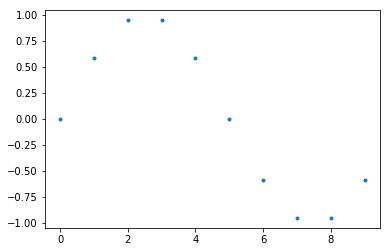

In [36]:
plt.plot(y[0:10],'.')

## Two dimensional object

Can be stored as an array of numbers. This is also a vector in a vector space, but with double indexing.

In [53]:
m=np.array([[0,0,0,0,0,0],[0,1,0,0,1,0],[0,0,0,0,0,0],[0,0,1,1,0,0],[1,0,0,0,0,1],[0,1,1,1,1,0],[0,0,0,0,0,0]])


In [54]:
m

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

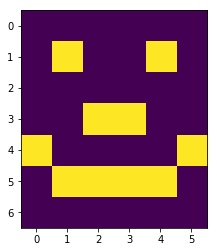

In [55]:
plt.imshow(m)

## Properties we might want

- there are vectors spaces around
- great to keep the transformations linear
- there are inner products around
- great if the transforms preserve inner products (orthogonal)
- great if the transforms are fast (order $n$, $n\log(n)$,  $n^2$, $n^3$)
- great if they respect other mathematical properties (derivatives?)
- respect physical properties in the signal (?)
- sparse representations
- specially designed wavelets for our signals

## Wavelet examples
[PY Wavelets toolbox](http://wavelets.pybytes.com/)

[Matlab wavelets](https://www.mathworks.com/products/wavelet.html)

## Using wavelet code

Probably the hardest part of using wavelet code is figuring out the data structures. We will work this out in class.

But here is an easy example, to get you started. 

In [10]:
import pywt

In [75]:
## We take the vector [1,2,3,4] and compute 4 basis coefficients
cA, cD = pywt.dwt([1, 2, 3, 4], 'db1')

In [76]:
cA


array([ 2.12132034,  4.94974747])

In [77]:
cD

array([-0.70710678, -0.70710678])

In [78]:
## Now lets take a longer vector (16 points), and compute a full wavelet decomposition.
coeffs=pywt.wavedecn(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]), 'db1')

In [80]:
## Note all the coefficients are zero, since we started with a zero vector
coeffs

[array([ 0.]),
 {'d': array([ 0.])},
 {'d': array([ 0.,  0.])},
 {'d': array([ 0.,  0.,  0.,  0.])},
 {'d': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}]

In [82]:
## Here we can access a particular coefficient
coeffs[3]["d"][1]

0.0

In [83]:
## Change it to be non-zero
coeffs[3]["d"][1] = 1

In [84]:
coeffs

[array([ 0.]),
 {'d': array([ 0.])},
 {'d': array([ 0.,  0.])},
 {'d': array([ 0.,  1.,  0.,  0.])},
 {'d': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}]

In [85]:
y  = pywt.waverecn(coeffs, 'db1')

In [87]:
y


array([ 0. ,  0. ,  0. ,  0. ,  0.5,  0.5, -0.5, -0.5,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ])

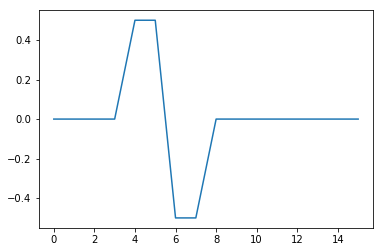

In [88]:
plt.plot(y)

## Result
This is one single wavelet in the wavelet basis. 
